<a href="https://www.kaggle.com/code/mohitpammu/cyclistic-google-data-analytics-capstone?scriptVersionId=198561734" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Case study: How does a bike-share navigate speedy success?**

**Mohit Pammu, MBA**

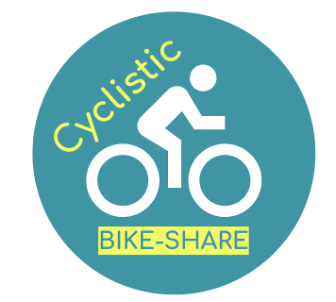

# **Table of Contents**

1. **[Overview](#1.-Overview)**  
2. **[Scenario](#2.-Scenario)**  
3. **[Ask](#3.-Ask)**  
    3.1 **[Business Task](#3.1-Business-Task)**    
    3.2 **[Key Stakeholders](#3.2-Key-Stakeholders)**  
4. **[Prepare](#4.-Prepare)**  
5. **[Process](#5.-Process)**  
    5.1 **[Establish Workspace](#5.1-Establish-Workspace)**     
    5.2 **[Data Import](#5.2-Data-Import)**  
    5.3 **[Data Cleaning](#5.3-Data-Cleaning)**  
6. **[Analyze](#6.-Analyze)**  
    6.1 **[Descriptive Analysis](#6.1-Descriptive-Analysis)**  
    6.2 **[Key Takeaways](#6.2-Key-Takeaways)**   
7. **[Share](#7.-Share)**  
    7.1 **[Figure 1: Number of Rides by Day and Rider Type](#Figure-1:-Number-of-Rides-by-Day-and-Rider-Type)**  
    7.2 **[Figure 2: Number of Rides by Day and Bike Type](#Figure-2:-Number-of-Rides-by-Day-and-Bike-Type)**  
    7.3 **[Figure 3: Average Ride Duration by Day and Rider Type](#Figure-3:-Average-Ride-Duration-by-Day-and-Rider-Type)**  
    7.4 **[Figure 4: Average Ride Duration by Day and Bike Type](#Figure-4:-Average-Ride-Duration-by-Day-and-Bike-Type)**  
    7.5 **[Figure 5: Number of Rides by Month and Rider Type](#Figure-5:-Number-of-Rides-by-Month-and-Rider-Type)**  
    7.6 **[Figure 6: Number of Rides by Month and Bike Type](#Figure-6:-Number-of-Rides-by-Month-and-Bike-Type)**  
    7.7 **[Figure 7: Average Ride Duration by Month and Rider Type](#Figure-7:-Average-Ride-Duration-by-Month-and-Rider-Type)**  
    7.8 **[Figure 8: Average Ride Duration by Month and Bike Type](#Figure-8:-Average-Ride-Duration-by-Month-and-Bike-Type)**  
    7.9 **[Figure 9: Number of Rides by Bike Type and Rider Type](#Figure-9:-Number-of-Rides-by-Bike-Type-and-Rider-Type)**  
8. **[Act](#8.-Act)**  
    8.1 **[Recommendations](#8.1-Recommendations)**  
    8.2 **[Conclusion](#8.2-Conclusion)**

# **1. Overview**

This analysis is my interpretation of the Google Data Analytics Capstone project. I utilized R for all data wrangling, cleaning, and vizualization to follow the steps of **[Ask](#3.-Ask)**, **[Prepare](#4.-Prepare)**, **[Process](#5.-Process)**, **[Analyze](#6.-Analyze)**, **[Share](#7.-Share)**, and **[Act](#8.-Act)** to answer the business questions provided.

[Return to Table of Contents](#Table-of-Contents)

# **2. Scenario**

"You are a junior data analyst working on the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations."

[Return to Table of Contents](#Table-of-Contents)

# **3. Ask**

### **3.1 Business Task**

The key business task assigned by the Marketing Director is: **"How do annual members and casual riders use Cyclistic bikes differently?"** 

Finance analysts for the company have determined that annual members are much more profitable than casual riders, therefore, a thorough analysis of historical data will help the team to better understand usage trends among the different memberships and craft an effective marketing strategy to convert casual users to members rather than simply targeting new customers.

### **3.2 Key Stakeholders**
* Cyclistic executive team  

* Lily Moreno (Director of Marketing)   

* Cyclistic marketing analytics team  

[Return to Table of Contents](#Table-of-Contents)

# **4. Prepare**

* Data for this analysis has been provided by [Divvy](https://divvy-tripdata.s3.amazonaws.com/index.html), deemed credible, and has been securely stored locally as well on kaggle

* The [Data License Agreement](https://divvybikes.com/data-license-agreement) can be found on this link and permits its use

* All files are in .csv format

[Return to Table of Contents](#Table-of-Contents)

# **5. Process**

### **5.1 Establish Workspace**
Load the necessary libraries to perform the required tasks and set conflict preferences.

In [1]:
# Load necessary packages

library("tidyverse") # Metapackage of all tidyverse packages
library("conflicted") # Manages conflicts
library("readxl") # Reads Excel files

conflict_prefer("filter", "dplyr") # Setting filter as default choice
conflict_prefer("lag", "dplyr") # Setting lag as default choice

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::lag over any other package.


### **5.2 Data Import**

Prior to import, all .csv files have been converted to .xlsx files.

Import 12 files to kaggle, each file representing one month from the year 2023 dataset utlizing the read_excel function.

In [2]:
# Import the datasets for each month

options(warn=-1)

y2023_01 <- read_excel("/kaggle/input/divvy-tripdata-2023/2023.01-divvy-tripdata.xlsx")
y2023_02 <- read_excel("/kaggle/input/divvy-tripdata-2023/2023.02-divvy-tripdata.xlsx")
y2023_03 <- read_excel("/kaggle/input/divvy-tripdata-2023/2023.03-divvy-tripdata.xlsx")
y2023_04 <- read_excel("/kaggle/input/divvy-tripdata-2023/2023.04-divvy-tripdata.xlsx")
y2023_05 <- read_excel("/kaggle/input/divvy-tripdata-2023/2023.05-divvy-tripdata.xlsx")
y2023_06 <- read_excel("/kaggle/input/divvy-tripdata-2023/2023.06-divvy-tripdata.xlsx")
y2023_07 <- read_excel("/kaggle/input/divvy-tripdata-2023/2023.07-divvy-tripdata.xlsx")
y2023_08 <- read_excel("/kaggle/input/divvy-tripdata-2023/2023.08-divvy-tripdata.xlsx")
y2023_09 <- read_excel("/kaggle/input/divvy-tripdata-2023/2023.09-divvy-tripdata.xlsx")
y2023_10 <- read_excel("/kaggle/input/divvy-tripdata-2023/2023.10-divvy-tripdata.xlsx")
y2023_11 <- read_excel("/kaggle/input/divvy-tripdata-2023/2023.11-divvy-tripdata.xlsx")
y2023_12 <- read_excel("/kaggle/input/divvy-tripdata-2023/2023.12-divvy-tripdata.xlsx")

### **5.3 Data Cleaning**

Document the cleaning process step-by-step.

In [3]:
# Convert end_lat column from character to numeric for the selected datasets to maintain consistency

y2023_01 <- mutate(y2023_01, end_lat = as.numeric(end_lat))
y2023_02 <- mutate(y2023_02, end_lat = as.numeric(end_lat))
y2023_03 <- mutate(y2023_03, end_lat = as.numeric(end_lat))
y2023_04 <- mutate(y2023_04, end_lat = as.numeric(end_lat))
y2023_05 <- mutate(y2023_05, end_lat = as.numeric(end_lat))
y2023_07 <- mutate(y2023_07, end_lat = as.numeric(end_lat))
y2023_08 <- mutate(y2023_08, end_lat = as.numeric(end_lat))
y2023_09 <- mutate(y2023_09, end_lat = as.numeric(end_lat))
y2023_10 <- mutate(y2023_10, end_lat = as.numeric(end_lat))
y2023_11 <- mutate(y2023_11, end_lat = as.numeric(end_lat))
y2023_12 <- mutate(y2023_12, end_lat = as.numeric(end_lat))

Stack individual dataframes into a single dataframe once all the columns on each table are matching.

In [4]:
# Combine tables into a single table

all_trips <- bind_rows(y2023_01,
                       y2023_02,
                       y2023_03,
                       y2023_04,
                       y2023_05,
                       y2023_06,
                       y2023_07,
                       y2023_08,
                       y2023_09,
                       y2023_10,
                       y2023_11,
                       y2023_12)

Remove uneccesary columns that are not relevant to the analysis and this will also reduce the size of the dataset and improve the efficiency of scripts being ran.

In [5]:
#Remove latitude and longitude fields as this data was dropped beginning in 2020

all_trips <- all_trips %>%
  select(-c(start_lat,start_lng,end_lat,end_lng))

Inspect the data to get a better understanding of what you'll be working with to perform the analysis. 

In [6]:
 # Statistical summary of data, mainly for numerics

summary(all_trips) 

   ride_id          rideable_type        started_at                    
 Length:5719877     Length:5719877     Min.   :2023-01-01 00:01:58.00  
 Class :character   Class :character   1st Qu.:2023-05-21 12:50:44.00  
 Mode  :character   Mode  :character   Median :2023-07-20 18:02:50.00  
                                       Mean   :2023-07-16 10:27:50.01  
                                       3rd Qu.:2023-09-16 20:08:49.00  
                                       Max.   :2023-12-31 23:59:38.00  
                                                                       
    ended_at                      start_station_name start_station_id  
 Min.   :2023-01-01 00:02:41.00   Length:5719877     Length:5719877    
 1st Qu.:2023-05-21 13:14:09.00   Class :character   Class :character  
 Median :2023-07-20 18:19:47.00   Mode  :character   Mode  :character  
 Mean   :2023-07-16 10:46:00.18                                        
 3rd Qu.:2023-09-16 20:28:10.00                                 

In [7]:
#See list of columns and data types (numeric, character, etc)

str(all_trips)

tibble [5,719,877 × 11] (S3: tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:5719877] "F96D5A74A3E41399" "13CB7EB698CEDB88" "BD88A2E670661CE5" "C90792D034FED968" ...
 $ rideable_type     : chr [1:5719877] "electric_bike" "classic_bike" "electric_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:5719877], format: "2023-01-21 20:05:42" "2023-01-10 15:37:36" ...
 $ ended_at          : POSIXct[1:5719877], format: "2023-01-21 20:16:33" "2023-01-10 15:46:05" ...
 $ start_station_name: chr [1:5719877] "Lincoln Ave & Fullerton Ave" "Kimbark Ave & 53rd St" "Western Ave & Lunt Ave" "Kimbark Ave & 53rd St" ...
 $ start_station_id  : chr [1:5719877] "TA1309000058" "TA1309000037" "RP-005" "TA1309000037" ...
 $ end_station_name  : chr [1:5719877] "Hampden Ct & Diversey Ave" "Greenwood Ave & 47th St" "Valli Produce - Evanston Plaza" "Greenwood Ave & 47th St" ...
 $ end_station_id    : chr [1:5719877] "202480" "TA1308000002" "599" "TA1308000002" ...
 $ member_casual     : chr [1:5719877] 

In preparation for analysis, will add columns for date, month, day, year, and day of week so that the data can be aggregated beyond the rider type level.

In [8]:
# Add columns that list the date, month, day, year, and day of week for each ride

all_trips$date <- as.Date(all_trips$started_at) #The default format is yyyy-mm-dd

all_trips$month <- format(as.Date(all_trips$date), "%m")

all_trips$day <- format(as.Date(all_trips$date), "%d")

all_trips$year <- format(as.Date(all_trips$date), "%Y")

all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

Add a calculated field for ride length to the dataframe which will be measured in seconds.

In [9]:
# Add a "ride_length" calculation to all_trips (in seconds) using difftime function

all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)

In order to perform calculations on the ride_length data, we need to convert the data type from factor to numeric.

In [10]:
# Convert "ride_length" from factor to numeric

all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))

Next, remove NA values to strengthen the integrity of the data, which creates a new version of the dataframe.

In [11]:
# Remove NA values 

all_trips_no_na <- drop_na(all_trips)

Negative ride_length values must be removed as well as entries where bikes were documented for quality checks by the company(not relevant for trend analysis). This again will create a new version of the dataframe and must be properly identified.

In [12]:
# There were a few hundred entries when bikes were taken out of docks and checked for quality by Divvy or ride_length was negative, using OR operator 

all_trips_v2 <- all_trips_no_na[!(all_trips_no_na$start_station_name == "HQ QR" | all_trips_no_na$ride_length<0),]

[Return to Table of Contents](#Table-of-Contents)

# **6. Analyze**  
### **6.1 Descriptive Analysis**

In [13]:
# All figures are measured in seconds

mean(all_trips_v2$ride_length) # (total ride length / rides)

median(all_trips_v2$ride_length) # Midpoint number 

max(all_trips_v2$ride_length) # Longest ride

min(all_trips_v2$ride_length) # Shortest ride


[1] 957.188

[1] 588

[1] 728178

[1] 0

In [14]:
# Summary() function of a specific attribute, in this case ride_length, condenses the four lines above into a single line

summary(all_trips_v2$ride_length)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     0.0    337.0    588.0    957.2   1049.0 728178.0 

In [15]:
# Compare members with casual users

aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = mean)

aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = median)

aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = max)

aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual, FUN = min)

all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,1376.3301
member,727.8752


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,765
member,517


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,728178
member,89872


all_trips_v2$member_casual,all_trips_v2$ride_length
<chr>,<dbl>
casual,0
member,0


Need to manually order the day of week attribute in the dataframe so that the output will look more organized. 

In [16]:
# Reordering days of the week

all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Sunday", 
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

Now the output appears in order from Sunday through Saturday.

In [17]:
# Average ride time by rider type by day converted to minutes

aggregate(all_trips_v2$ride_length/60 ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length/60
<chr>,<ord>,<dbl>
casual,Sunday,26.56719
member,Sunday,13.61275
casual,Monday,22.53355
member,Monday,11.54974
casual,Tuesday,20.51494
member,Tuesday,11.64816
casual,Wednesday,19.59844
member,Wednesday,11.58607
casual,Thursday,19.99900


In [18]:
# Use the wday() function to create a weekday field
# Group the data by rider type and weekday
# Calculate the total number of rides (counts every single observation in the group)
# Calculate average duration or ride length and converts into minutes
# Sort the output by rider type and weekday

all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>%   
  summarise(number_of_rides = n() 
            ,average_duration = mean(ride_length/60)) %>% 
  arrange(member_casual, weekday) 

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,254758,26.56719
casual,Mon,175423,22.53355
casual,Tue,181551,20.51494
casual,Wed,183094,19.59844
casual,Thu,198949,19.99900
casual,Fri,227882,22.31783
casual,Sat,310180,25.92035
member,Sun,307859,13.61275
member,Mon,386694,11.54974


### **6.2 Key Takeaways**

After performing the descriptive analysis, some important things to note on usage trends/ relationships are:

* Casual user ride length(22.49 minutes) is approximately 1.84x the average duration than that of members(12.23 minutes) 
* Inversely, members(2,799,920 number of rides) have a higher frequency of use at about 1.83x compared to casual users(1,531,837 number of rides)
* Members account for approximately 64.64% of total usage compared to 35.36% by casual users
* Casual users record heavier usage on the weekends(Fri-Sun) while members use them more during the week(Mon-Fri) signaling that members mainly utilize the bike share for commuting to work or school and casual users more for leisure/tourism  

[Return to Table of Contents](#Table-of-Contents)

# **7. Share**

Now we'll use visual representations to take a deeper dive into the data. This will help us get a better understanding of the specifics of usage trends by making the information more digestable.

*Note visuals are consistent with company colors to maintain theme and are colorblind safe

### **Figure 1: Number of Rides by Day and Rider Type**

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


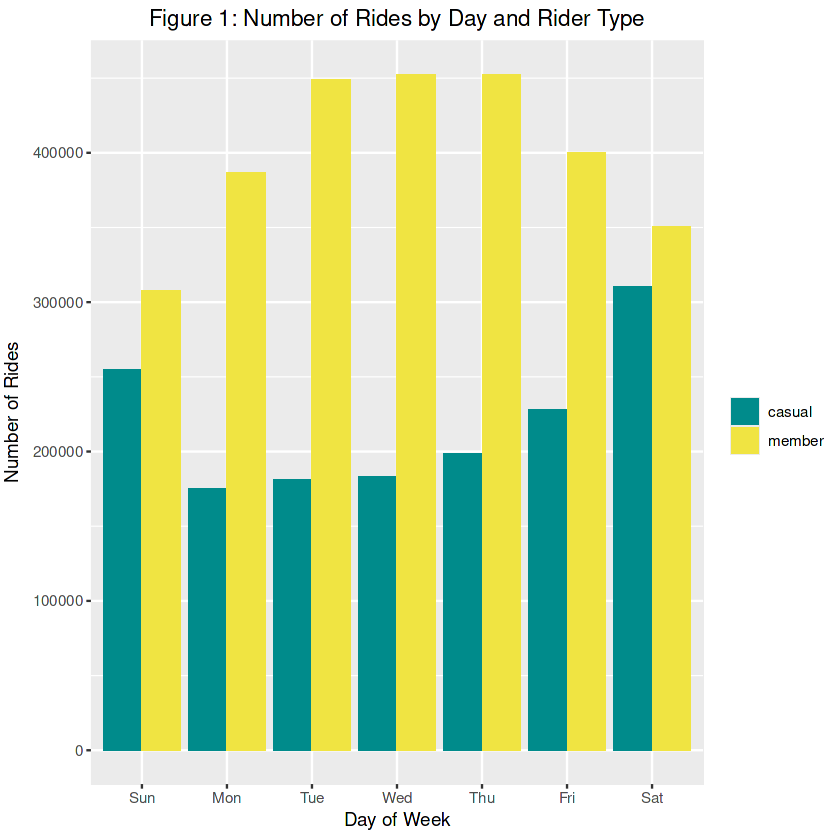

In [19]:
options(scipen = 999)
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length/60)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  scale_fill_manual(values = c("#008b8b","#F0E442")) +
  geom_col(position = "dodge") + 
  labs(title = "Figure 1: Number of Rides by Day and Rider Type", fill = " ") + 
  ylab("Number of Rides") + 
  xlab("Day of Week") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.title.y = element_text(vjust = 2)) 

#### **Findings**
Here we can see peak usage for casual users is on Saturday while peak usage for members is on Wednesday and Thursday. Lowest usage for casual users is Monday while lowest usage for members is on Sunday. There is opportunity to incentivize weekday usage for non members.

### **Figure 2: Number of Rides by Day and Bike Type**

`summarise()` has grouped output by 'rideable_type'. You can override using the
`.groups` argument.


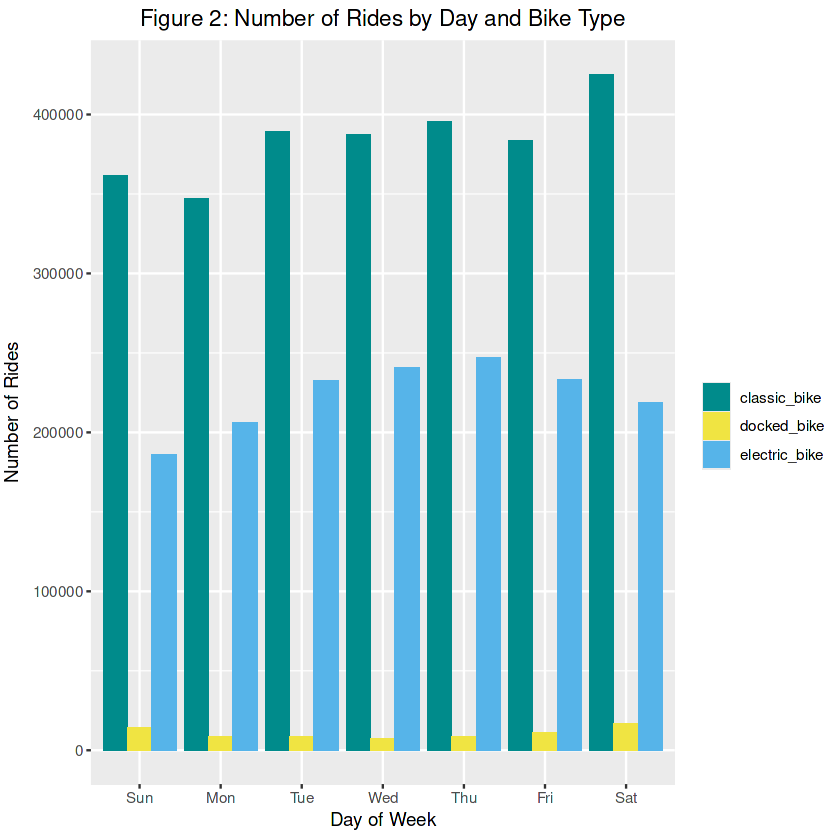

In [20]:
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(rideable_type, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length/60)) %>% 
  arrange(rideable_type, weekday)  %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = rideable_type)) +
  scale_fill_manual(values = c("#008b8b","#F0E442", "#56B4E9")) +
  geom_col(position = "dodge") + 
  labs(title = "Figure 2: Number of Rides by Day and Bike Type", fill = " ") + 
  ylab("Number of Rides") + 
  xlab("Day of Week") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.title.y = element_text(vjust = 2)) 

### **Findings**
The classic bike is the preferred bike of choice among both types of users with its highest usage on Saturday. This could just mean there are a higher number of classic bikes available for use than electric bikes. Highest usage for electric bikes is on Thursday and lowest on Monday.

### **Figure 3: Average Ride Duration by Day and Rider Type**

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


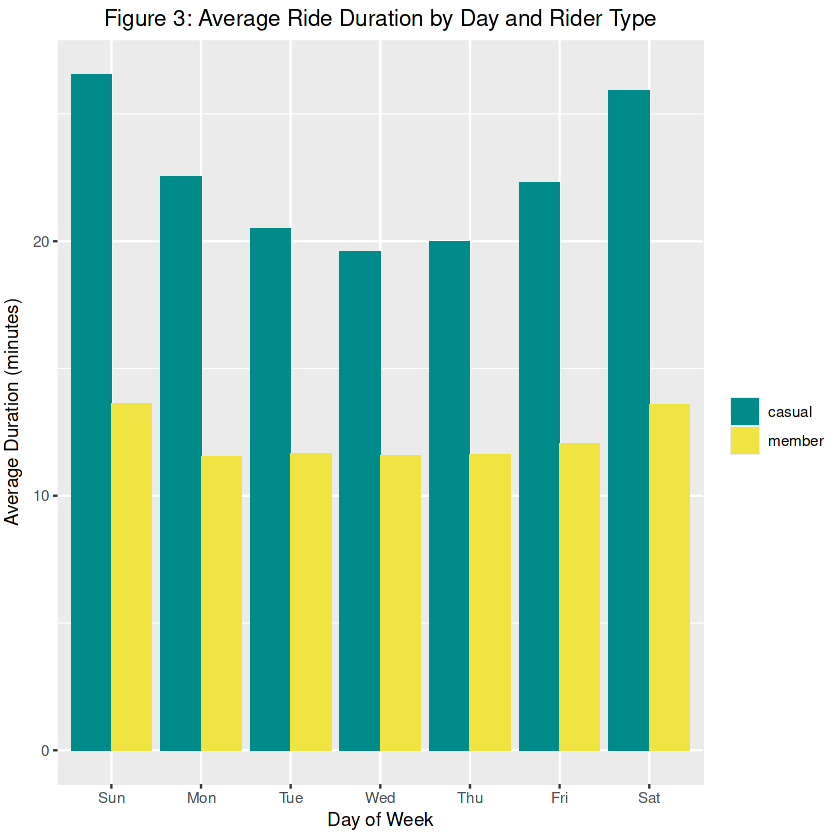

In [21]:
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(member_casual, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length/60)) %>% 
  arrange(member_casual, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  scale_fill_manual(values = c("#008b8b","#F0E442")) +
  geom_col(position = "dodge") + 
  labs(title = "Figure 3: Average Ride Duration by Day and Rider Type", fill = " ") + 
  ylab("Average Duration (minutes)") + 
  xlab("Day of Week") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.title.y = element_text(vjust = 2))

#### **Findings**
This graph indicates the longest ride duration for casual members is on Sunday and Saturday, dipping to its lowest duration on Wednesday. Similarly, members also exhibit longest ride duration on Sunday and Saturday, however, their usage for the whole week does not deviate too far from the mean. Members are efficient with their usage having never topped 15 min average duration. As stated earlier, one conclusion that can be drawn is members mainly utilize the service for commuting to work or school while casual users enjoy more time on the bike for leisure/ tourism.  

### **Figure 4: Average Ride Duration by Day and Bike Type**

`summarise()` has grouped output by 'rideable_type'. You can override using the
`.groups` argument.


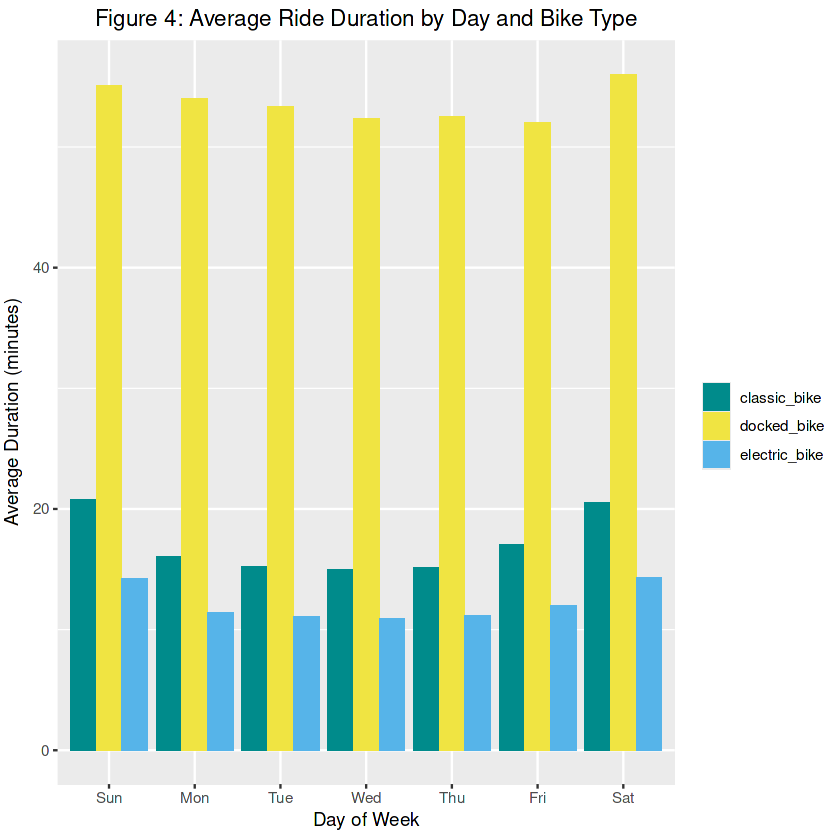

In [22]:
all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>% 
  group_by(rideable_type, weekday) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length/60)) %>% 
  arrange(rideable_type, weekday)  %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = rideable_type)) +
  scale_fill_manual(values = c("#008b8b", "#F0E442", "#56B4E9")) +
  geom_col(position = "dodge") + 
  labs(title = "Figure 4: Average Ride Duration by Day and Bike Type", fill = " ") + 
  ylab("Average Duration (minutes)") + 
  xlab("Day of Week") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.title.y = element_text(vjust = 2))


#### **Findings**

Classic Bikes are ridden on average about 20 min on Sunday and Saturday. We'll ignore the docked bike column as that should indicate the time between usage which ranges at close to an hour. The lowest average duration of ride length for both classic and electric bikes is on Wednesday indicating users are the busiest/have the least time to use the bike on that day. 

### **Figure 5: Number of Rides by Month and Rider Type**

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


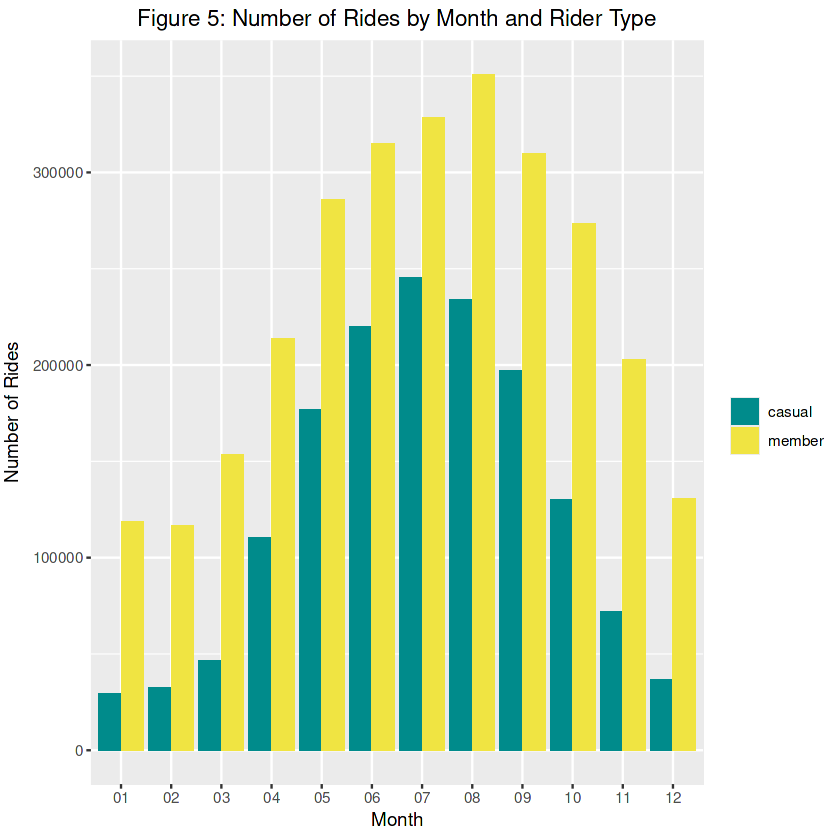

In [23]:
all_trips_v2 %>% 
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length/60)) %>% 
  arrange(member_casual, month)  %>% 
  ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) +
  scale_fill_manual(values = c("#008b8b", "#F0E442")) +
  geom_col(position = "dodge") + 
  labs(title = "Figure 5: Number of Rides by Month and Rider Type", fill = " ") + 
  ylab("Number of Rides") + 
  xlab("Month") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.title.y = element_text(vjust = 2)) 


#### **Findings**
The busiest months for member usage are from May through October. Similarly, the busiest months for casual users are from May through September. Lowest usage for both rider types are exhibited in January, February, and December. This indicates that inclement weather during winter months heavily influences a decline in usage. 

### **Figure 6: Number of Rides by Month and Bike Type**

`summarise()` has grouped output by 'rideable_type'. You can override using the
`.groups` argument.


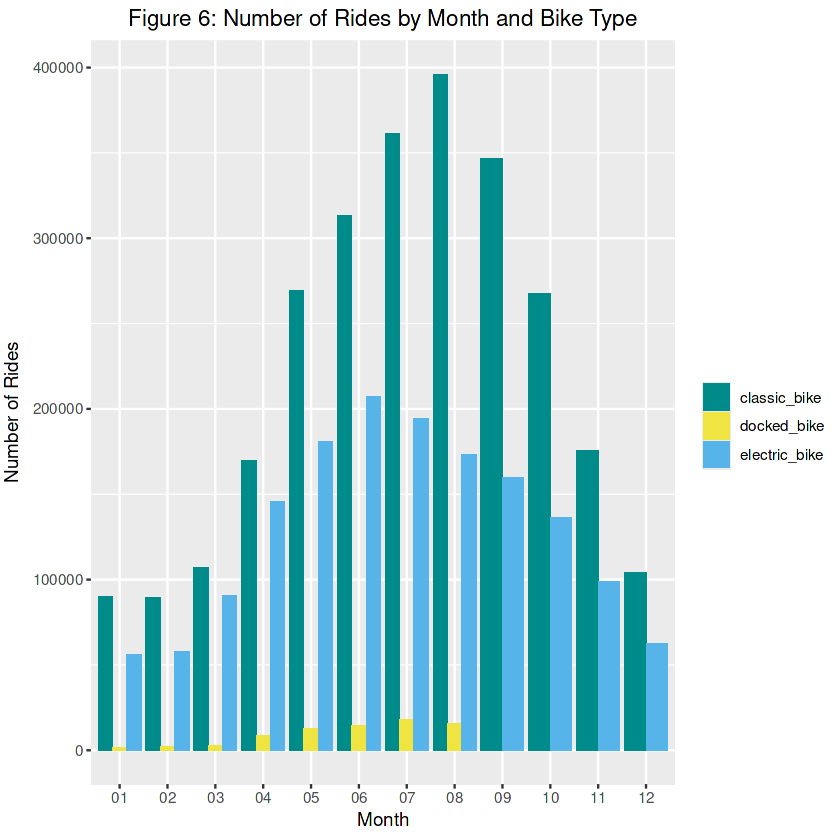

In [24]:
all_trips_v2 %>% 
  group_by(rideable_type, month) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length/60)) %>% 
  arrange(rideable_type, month)  %>% 
  ggplot(aes(x = month, y = number_of_rides, fill = rideable_type)) +
  scale_fill_manual(values = c("#008b8b", "#F0E442", "#56B4E9")) +
  geom_col(position = "dodge") + 
  labs(title = "Figure 6: Number of Rides by Month and Bike Type", fill = " ") + 
  ylab("Number of Rides") + 
  xlab("Month") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.title.y = element_text(vjust = 2))


#### **Findings**
This graph directly correlates with Figure 5, as highest usage for both bike types are from May through October. August is recorded as being the highest usage month for classic bikes at close to 400,000 number of rides. Electric bikes are used most during June at over 200,000 number of rides.

### **Figure 7: Average Ride Duration by Month and Rider Type**

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


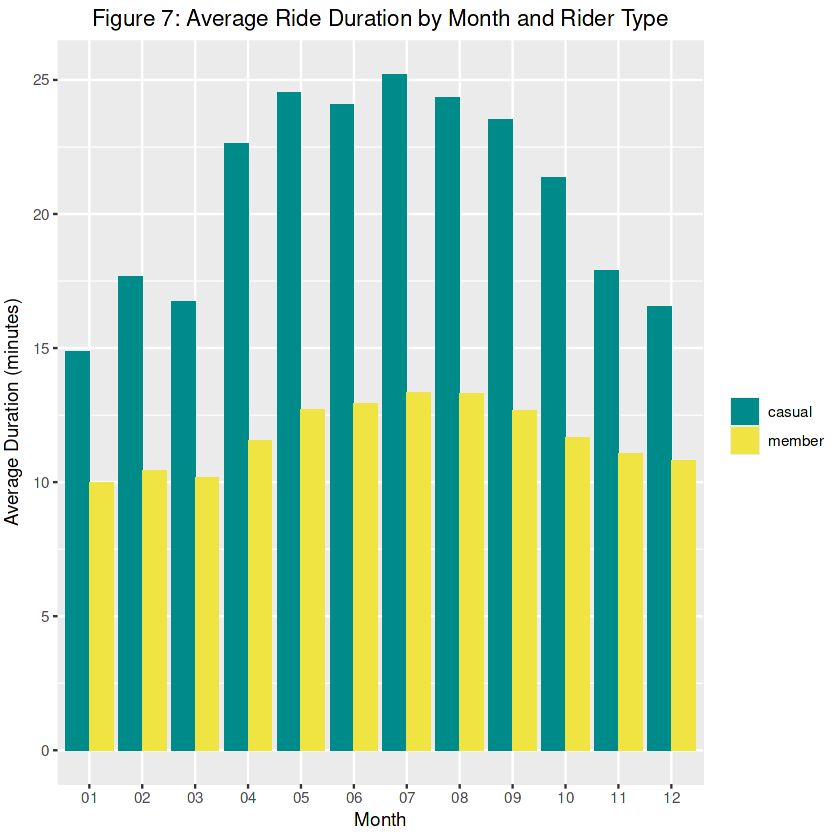

In [25]:
all_trips_v2 %>% 
  group_by(member_casual, month) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length/60)) %>% 
  arrange(member_casual, month)  %>% 
  ggplot(aes(x = month, y = average_duration, fill = member_casual)) +
  scale_fill_manual(values = c("#008b8b", "#F0E442")) +
  geom_col(position = "dodge") + 
  labs(title = "Figure 7: Average Ride Duration by Month and Rider Type", fill = " ") + 
  ylab("Average Duration (minutes)") + 
  xlab("Month") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.title.y = element_text(vjust = 2))

#### **Findings**
Ride duration for members maintains a relative average throughout the year from about 10 min(lowest) to 13 min(highest). So despite the time of year/weather patterns, members are more or less using the bikes for a consistent amount of time. Casual users enjoy the bikes the longest starting from April through September(ranging from 22 min to a little over 25 min) exhibiting seasonal trends, lowest being under 15 min in January. This is still significantly longer than member bike usage.                                                              

### **Figure 8: Average Ride Duration by Month and Bike Type**

`summarise()` has grouped output by 'rideable_type'. You can override using the
`.groups` argument.


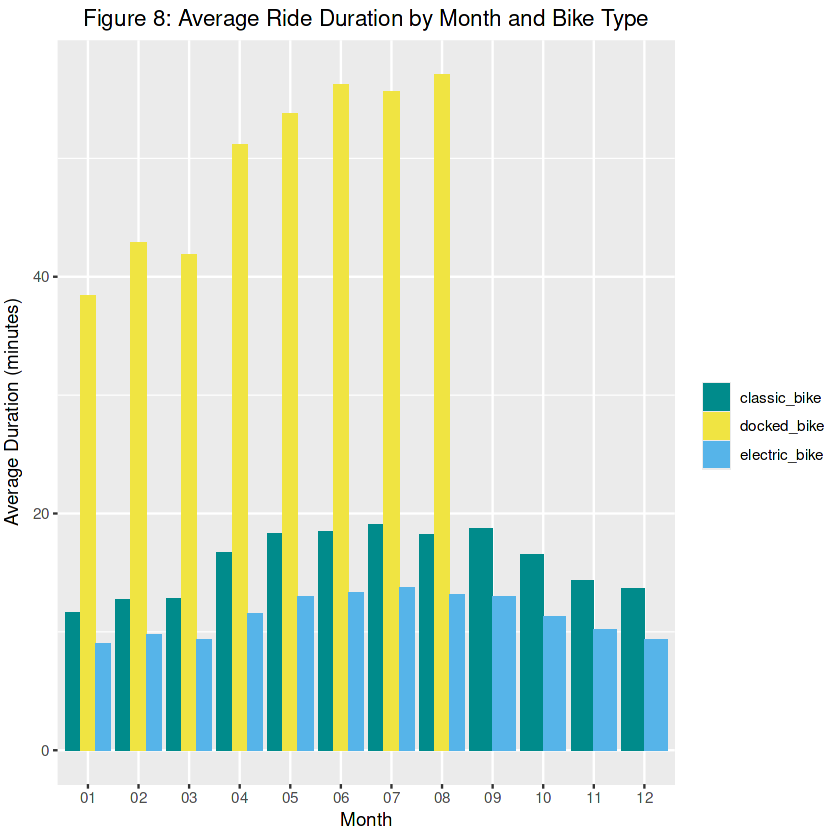

In [26]:
all_trips_v2 %>% 
  group_by(rideable_type, month) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length/60)) %>% 
  arrange(rideable_type, month)  %>% 
  ggplot(aes(x = month, y = average_duration, fill = rideable_type)) +
  scale_fill_manual(values = c("#008b8b", "#F0E442", "#56B4E9")) +
  geom_col(position = "dodge") + 
  labs(title = "Figure 8: Average Ride Duration by Month and Bike Type", fill = " ") + 
  ylab("Average Duration (minutes)") + 
  xlab("Month") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.title.y = element_text(vjust = 2))

#### **Findings**

We can ignore the docked bike duration. Average duration for both bike types follow a similar pattern where they trend up in usage during summer months and trend down during winter months. Both bike types maintain a consistent average duration from May through September. 

### **Figure 9: Number of Rides by Bike Type and Rider Type**

`summarise()` has grouped output by 'rideable_type'. You can override using the
`.groups` argument.


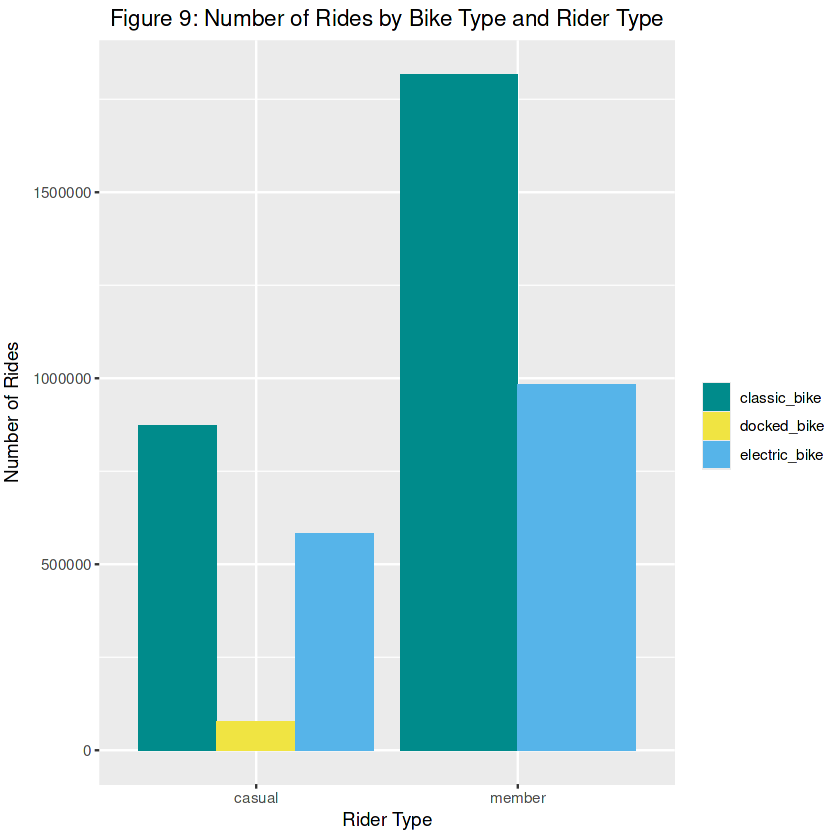

In [27]:
all_trips_v2 %>% 
  group_by(rideable_type, member_casual) %>% 
  summarise(number_of_rides = n()) %>% 
  arrange(rideable_type, member_casual)  %>% 
  ggplot(aes(x = member_casual, y = number_of_rides, fill = rideable_type)) +
  geom_col(position = "dodge") + 
  scale_fill_manual(values = c("#008b8b", "#F0E442", "#56B4E9")) + 
  labs(title = "Figure 9: Number of Rides by Bike Type and Rider Type", fill = " ") + 
  ylab("Number of Rides") + 
  xlab("Rider Type") +
  theme(plot.title = element_text(hjust = 0.5)) +
  theme(axis.title.y = element_text(vjust = 2))

#### **Findings**
Member usage accounts for a significant amount more than casual users. Member usage of electric bikes alone is still higher than casual usage of classic bikes. 

Export the data so the file is shareable.

In [28]:
# Create a new dataframe with the relevant aggregation and write a .csv file

counts <- aggregate(all_trips_v2$ride_length ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)
write.csv(counts, file = 'avg_ride_length.csv')


[Return to Table of Contents](#Table-of-Contents)

# 8. Act

Now that the analysis is complete, we can apply these insights to craft a marketing campaign with the purpose of converting casual users to members.

### **8.1 Recommendations**

* **Member Exclusive Benefits**- Make being a member more attractive. Based on the findings, casual users utilize the bikes for leisure activities/ tourism. The company can provide discounts to local businesses such as coffee shops and attractions like museums that are visited most frequently.
* **Usage Time Promotion**- Earn points towards a membership subscription or other discounts based on how long the bike is used and it's capped at a certain amount. We know that casual users already ride the bikes for longer durations so it would be easy to reward them for their extended use.
* **Membership Rank**- This can be a subfeature of Member Exclusive Benefits. Members can check-in to points on the map they've visited, the more places you've visited, the higher status your member profile will be. This can also be geared towards frequency of use. Members who utilize the bike a high number of times to commute to work or school will also acheive a higher profile status, fostering the perception of exclusivity. Seeing the most visited places on a map by other users will also generate interest and engagement, building a sense of community.  
* **Seasonal/ Weekend Only Memberships**- Casual riders use the bikes most heavily on the weekends so creating a weekend only plan at a lower cost would be very attractive. Similarly, winter months record the lowest usage so to increase engagment users can earn double reward points during these periods. 
* **Bike Type Specific Promotions**- Examining the lower usage days, the company can offer extra points or rewards for using a specific type of bike.

### **8.2 Conclusion**
Understanding the patternistic behavior of casual users and members led us to find that there are ample areas of opportunity to convert casual users into members. Whether it be offering a Seasonal/Weekend Only Membership or making the annual membership itself more attractive through discounts and promotions, casual users will WANT to maximize their usage. This can be achieved by creating a user experience that supports community engagement. By striking the balance between exculisity and belonging, the company can dramatically increase profitability. 

[Return to Table of Contents](#Table-of-Contents)